In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
PWD: str = "/Users/andreasliistro/Documents/Development/Projects/sport-analysis"
PATH: str = f"{PWD}/strava/data/private/"

In [3]:
df_activities = pd.read_csv(f"{PATH}activities.csv")

print(df_activities.shape, '\n')
print(df_activities.describe, '\n')

(107, 46) 

<bound method NDFrame.describe of               id                            name  distance  moving_time  \
0    10924705381     Fachhochschule nach Hause 💪   40881.2         6091   
1    10920524518        Ab in die Fachhochschule   23466.1         3556   
2    10835912953  Afternoon E-Mountain Bike Ride   28723.7         4629   
3    10799368192                    Morning Ride   30263.3         4741   
4    10788371940                  Afternoon Ride   52676.6         8420   
..           ...                             ...       ...          ...   
102   7522156451                    Morning Ride       0.0         2551   
103   7522156674                    Morning Ride       0.0         2574   
104   7522156760                    Morning Ride       0.0         1869   
105   7522156790                    Evening Ride       0.0         1922   
106   7522156893                  Afternoon Ride       0.0         1796   

     elapsed_time  total_elevation_gain       type   

### Data from 2023

In [4]:
mask_2023 = (df_activities['start_date'] >= '2023-01-01') & (df_activities['start_date'] < '2024-01-01')
df_activities_2023 = df_activities.loc[mask_2023]
df_activities_2023.head()

,id,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,start_date,...,elev_high,elev_low,upload_id,pr_count,athlete_id,map_id,start_lat,start_lng,end_lat,end_lng
10,10462523281,Lunch E-Mountain Bike Ride,46670.4,7780,13183,780.0,EBikeRide,EMountainBikeRide,NaN,2023-12-30T11:22:15Z,...,720.8,288.0,11196673697,0,"{'id': 106018162, 'resource_state': 1}",a10462523281,47.504897,8.026634,47.504254,8.026203
11,10445718191,Lunch Ride,101264.0,16581,19518,1142.0,Ride,Ride,10.0,2023-12-27T10:44:51Z,...,943.6,253.6,11179253876,12,"{'id': 106018162, 'resource_state': 1}",a10445718191,47.504341,8.026249,47.551251,7.791883
12,10425647548,Vor Weihnachts-Fahrt/Mudfest! 💪,50191.3,9901,11989,1302.0,EBikeRide,EMountainBikeRide,NaN,2023-12-23T12:44:38Z,...,652.0,324.0,11158317450,0,"{'id': 106018162, 'resource_state': 1}",a10425647548,47.503916,8.025868,47.504015,8.026365
13,10395368689,Langsames Eingewöhnen....,34210.6,5671,6061,211.0,EBikeRide,EMountainBikeRide,NaN,2023-12-17T13:32:47Z,...,361.2,290.0,11127218360,0,"{'id': 106018162, 'resource_state': 1}",a10395368689,47.504148,8.026284,47.504230,8.026304
14,10359379663,Kopf auslüften... 💪,21098.6,3682,4017,419.4,EBikeRide,EMountainBikeRide,NaN,2023-12-10T14:23:44Z,...,720.0,325.8,11089636738,0,"{'id': 106018162, 'resource_state': 1}",a10359379663,47.553095,7.842427,47.504217,8.026318


In [5]:
# filter out ebike rides
df_2023 = df_activities_2023[df_activities_2023['type'] != 'EBikeRide']
print(df_2023.shape)

(48, 46)


## Print data as demo

              start_date  distance  moving_time  total_elevation_gain  \
11  2023-12-27T10:44:51Z  101264.0        16581                1142.0   
16  2023-11-08T15:09:47Z   33114.4         4319                 202.0   
17  2023-10-12T09:02:21Z   56780.8         7760                 350.0   
18  2023-10-05T15:18:17Z   43472.8         5799                 298.0   
19  2023-10-02T15:35:40Z   25426.4         3061                 155.0   

    average_speed  
11          6.107  
16          7.667  
17          7.317  
18          7.497  
19          8.307  


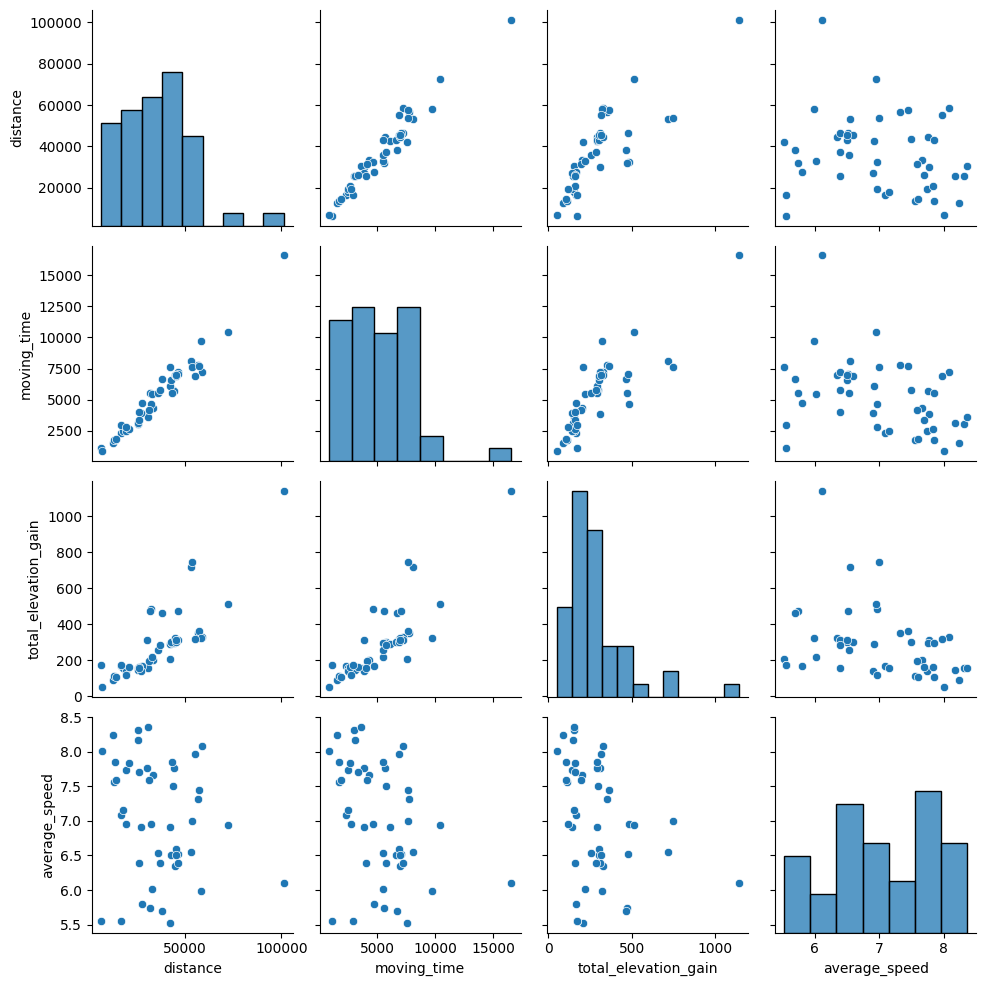

In [8]:
df_2023_subset = df_2023[['start_date', 'distance', 'moving_time', 'total_elevation_gain', 'average_speed']]
print(df_2023_subset.head())

sns.pairplot(df_2023_subset)